In [51]:
from pathlib import Path

In [53]:
filePath = Path.cwd().parent / "Datasets" / "NegativeDataset.csv"
import pandas as pd

In [55]:
df = pd.read_csv(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1744 non-null   int64 
 1   Reviews     1744 non-null   object
 2   Mood        1744 non-null   object
dtypes: int64(1), object(2)
memory usage: 41.0+ KB


In [57]:
df = df.drop(columns = 'Unnamed: 0')
df.head()

,Reviews,Mood
0,Saw 'The Emoji Movie' as a big fan of animatio...,Negative
1,"'The Emoji Movie"" is a new children's film. On...",Negative
2,The movie is not that bad I don't understand a...,Negative
3,I hate this movie so much! It wasted such perf...,Negative
4,"The plot is not exactly stellar, however the p...",Negative


In [59]:
import re

In [61]:
df.Reviews = df['Reviews'].apply(lambda text: re.sub(r'[^a-zA-Z\s]', '', text))
df.head()

,Reviews,Mood
0,Saw The Emoji Movie as a big fan of animation ...,Negative
1,The Emoji Movie is a new childrens film One of...,Negative
2,The movie is not that bad I dont understand al...,Negative
3,I hate this movie so much It wasted such perfe...,Negative
4,The plot is not exactly stellar however the pe...,Negative


<Axes: xlabel='Reviews', ylabel='Count'>

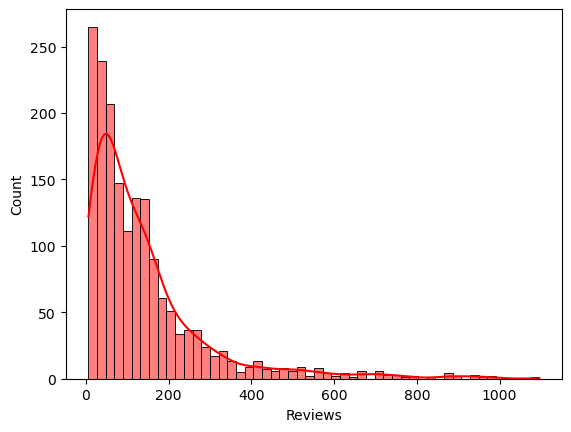

In [63]:
import seaborn as sns
sns.histplot(df['Reviews'].apply(lambda text: len(text.split())), kde = True, color = 'red')

<Axes: xlabel='Reviews', ylabel='Count'>

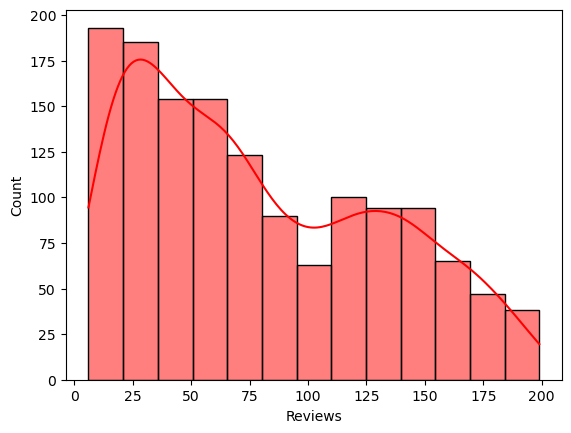

In [85]:
df_ = df[(df.Reviews.str.split().str.len() > 3) & (df.Reviews.str.split().str.len() < 200)]
sns.histplot(df_['Reviews'].apply(lambda text: len(text.split())), kde = True, color = 'red')

In [87]:
len(df_.index)

1400

In [91]:
filePath2 = Path.cwd().parent / 'PreprocessedData' / 'NegativeDataset.csv'
df_.to_csv(filePath2, index = False)